<a href="https://colab.research.google.com/github/maingoc1605/mai/blob/main/potato_leave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Found 2152 files belonging to 3 classes.
['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
Epoch 1/10
54/54 [==============================] - 170s 145ms/step - loss: 9.9669 - accuracy: 0.5706 - val_loss: 0.5821 - val_accuracy: 0.8073
Epoch 2/10
54/54 [==============================] - 4s 68ms/step - loss: 0.4535 - accuracy: 0.8368 - val_loss: 0.3893 - val_accuracy: 0.8594
Epoch 3/10
54/54 [==============================] - 4s 68ms/step - loss: 0.2606 - accuracy: 0.9039 - val_loss: 0.1824 - val_accuracy: 0.9375
Epoch 4/10
54/54 [==============================] - 4s 67ms/step - loss: 0.1850 - accuracy: 0.9317 - val_loss: 0.0934 - val_accuracy: 0.9844
Epoch 5/10
54/54 [==============================] - 4s 68ms/step - loss: 0.1494 - accuracy: 0.9462 - val_loss: 0.2502 - val_accuracy: 0.8854
Epoch 6/10
54/54 [==============================] - 4s 67ms/step - loss: 0.1244 - accuracy: 0.9525 - val_loss: 0.0745 - val_accuracy: 0.9688
Epoch 7/10
54/54 [======================

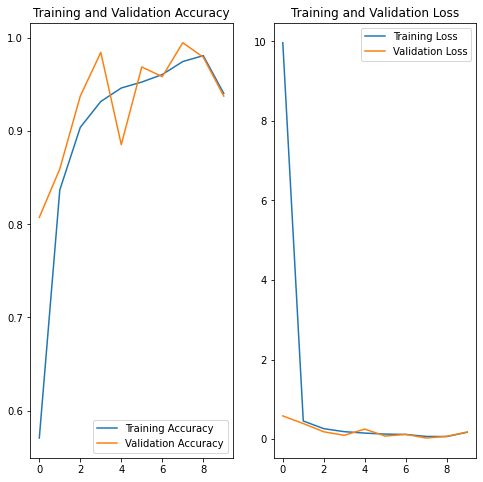

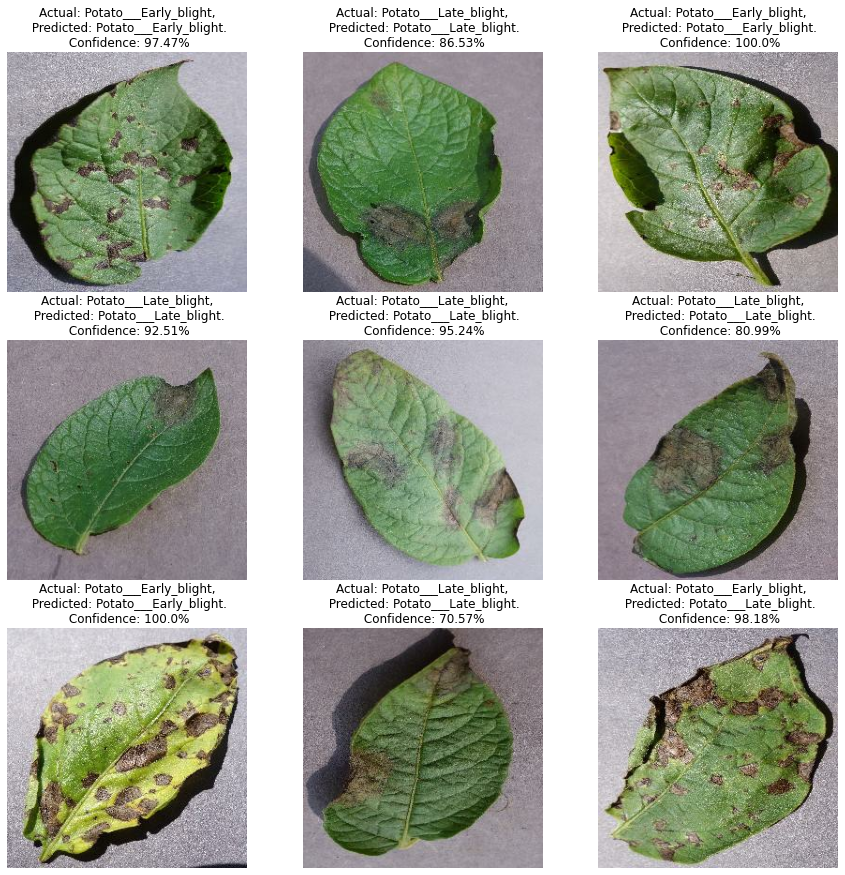

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
import matplotlib.pyplot as plt
IMAGE_SIZE = 256
BATCH_SIZE = 32
Channels = 3
Epochs = 10
dataset = tf.keras.preprocessing.image_dataset_from_directory("gdrive/MyDrive/potato/training",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE)
class_names = dataset.class_names
print(class_names)
#batch size=32 => len(dataset)=total_anh/32
#plt.figure(figsize=(10, 10))
#or image_batch, labels_batch in dataset.take(1):
    #for i in range(12):
       # ax = plt.subplot(3, 4, i + 1)
        #plt.imshow(image_batch[i].numpy().astype("uint8"))
        #plt.title(class_names[labels_batch[i]])
        #plt.axis("off")
    #plt.show()

def get_dataset(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=100):
    ds_size=len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split*ds_size)
    val_size =int(val_split*ds_size)
    test_size =int(test_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds, val_ds,test_ds
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,Channels)
n_class = 3
model = models.Sequential([
    layers.Conv2D(32,kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_class,activation='softmax')
])
model.build(input_shape=input_shape)
#print(model.summary())
train_ds, val_ds, test_ds = get_dataset(dataset)
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
history=model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)
#print(history)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(Epochs), acc, label='Training Accuracy')
plt.plot(range(Epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(Epochs), loss, label='Training Loss')
plt.plot(range(Epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
import numpy as np
def predict(model, img):
    img_array = images[i].numpy().astype("uint8")
    img_array= tf.expand_dims(img_array,0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence


plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    plt.show()
